In [2]:
import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot


In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
heart=pd.read_csv('cardio_train.csv', delimiter=';')

In [5]:
heart = heart.drop('id', axis=1)

In [6]:
heart = heart.rename(columns={'sex': 'gender'})
heart

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,fbs,smoke,alco,active,target
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [7]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info) - 1):
    print(heart.columns[i]+":\t\t\t"+info[i])

age:			age
gender:			1: male, 0: female
height:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
weight:			resting blood pressure
ap_hi:			 serum cholestoral in mg/dl
ap_lo:			fasting blood sugar > 120 mg/dl
cholesterol:			resting electrocardiographic results (values 0,1,2)
fbs:			 maximum heart rate achieved
smoke:			exercise induced angina
alco:			oldpeak = ST depression induced by exercise relative to rest
active:			the slope of the peak exercise ST segment
target:			number of major vessels (0-3) colored by flourosopy


In [8]:
heart.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'fbs', 'smoke', 'alco', 'active', 'target'],
      dtype='object')

In [9]:
heart['target']

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: target, Length: 70000, dtype: int64

In [10]:
heart.groupby('target').size()

target
0    35021
1    34979
dtype: int64

In [11]:
heart.groupby('target').sum()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,fbs,smoke,alco,active
target,,,,,,,,,,,
0,661253344,47128,5759134,2507228.7,4217670,2950581,42604,41163,3240,1941,28643
1,701567263,47342,5746012,2687169.6,4799540,3813548,53077,44689,2929,1823,27618


In [12]:
heart.shape

(70000, 12)

In [13]:
heart.size

840000

In [14]:
heart.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,fbs,smoke,alco,active,target
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
heart.shape


(70000, 12)

In [16]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   fbs          70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  target       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [17]:
heart['target'].unique()

array([0, 1], dtype=int64)

In [18]:
#Visualization

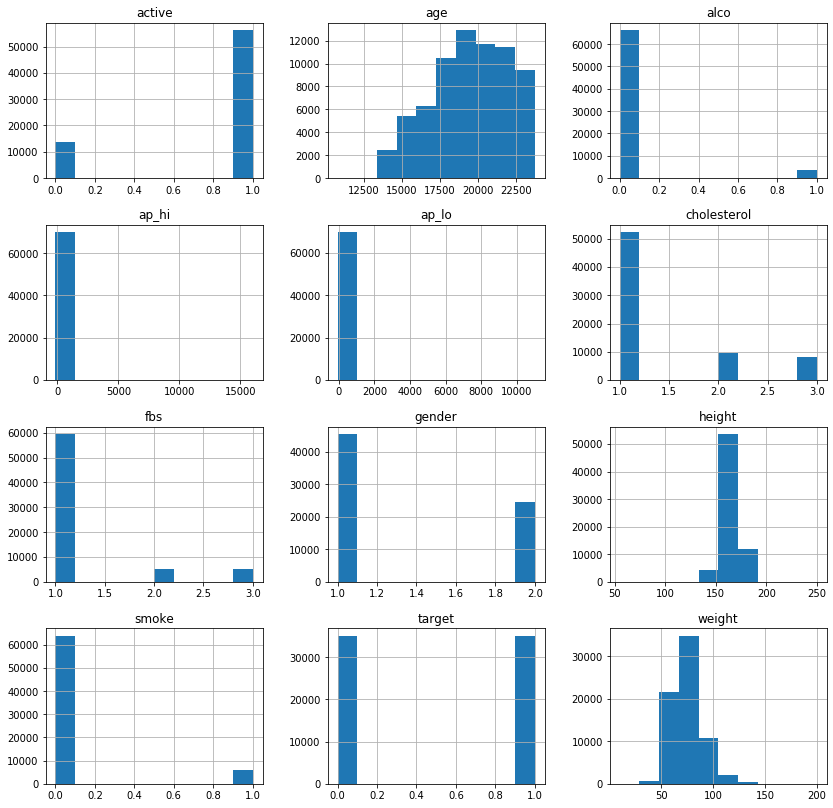

In [19]:
heart.hist(figsize=(14,14))
plt.show()

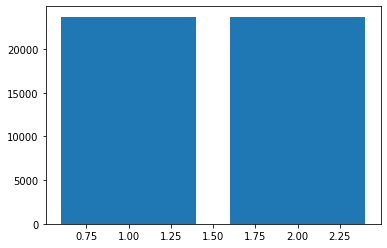

In [20]:
plt.bar(x=heart['gender'],height=heart['age'])
plt.show()

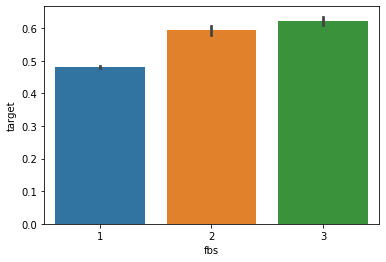

In [21]:
sns.barplot(x="fbs", y="target", data=heart)
plt.show()

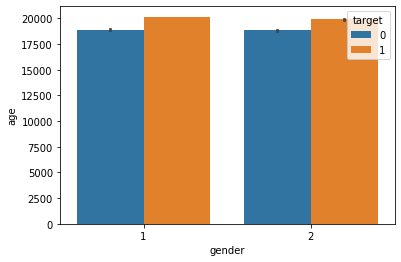

In [22]:
sns.barplot(x=heart['gender'],y=heart['age'],hue=heart['target'])

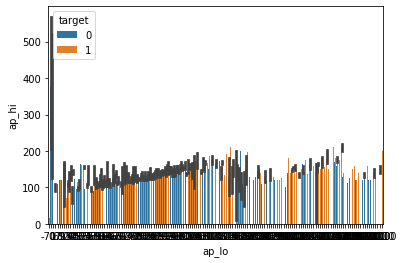

In [23]:
sns.barplot(x=heart["ap_lo"], y=heart['ap_hi'], hue=heart['target'])

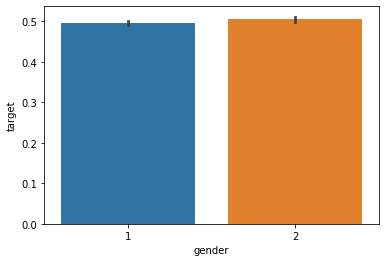

In [24]:
sns.barplot(heart["gender"],heart['target'])

In [25]:
# px.bar(heart,heart['sex'],heart['target'])

In [26]:
# sns.distplot(heart["thal"])

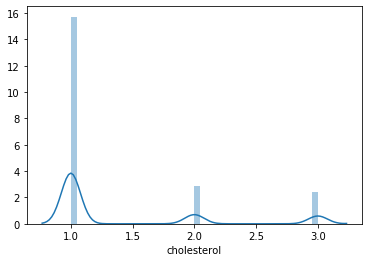

In [27]:
sns.distplot(heart["cholesterol"])

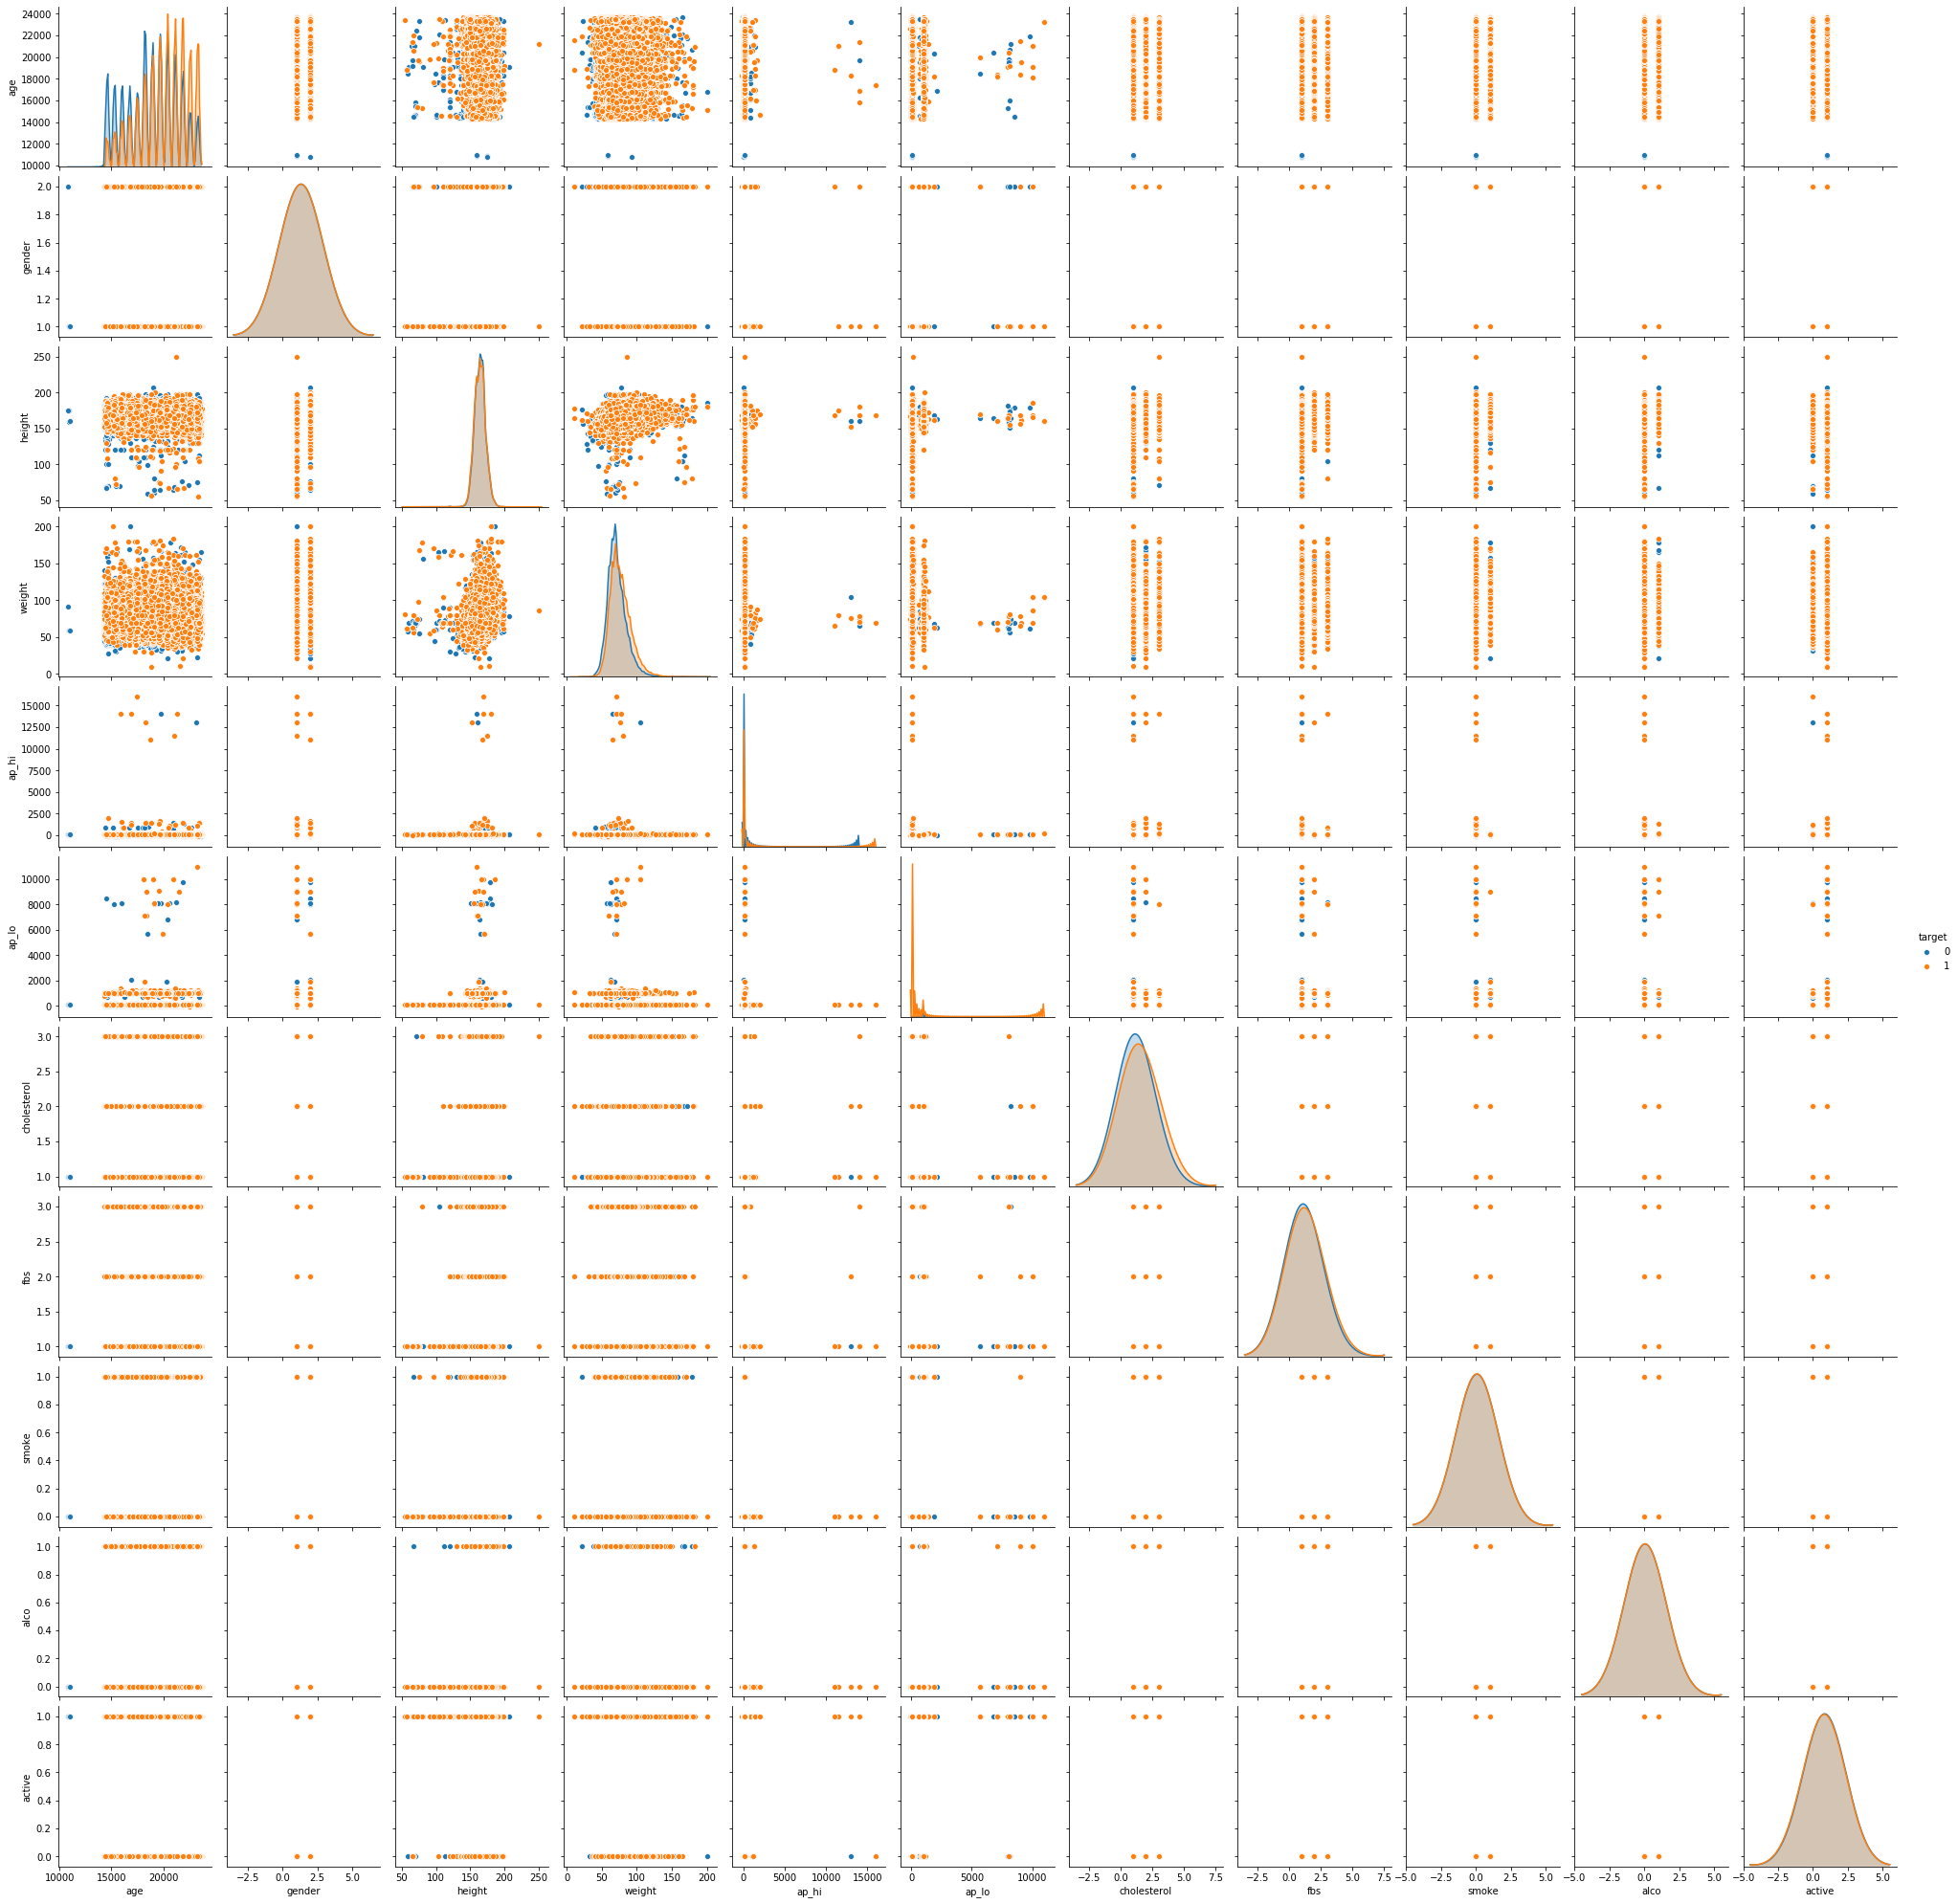

In [28]:
sns.pairplot(heart,hue='target', diag_kws={'bw': 1.5})

In [28]:
heart

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,fbs,smoke,alco,active,target
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [29]:
numeric_columns=['ap_hi','cholesterol','ap_lo','age','fbs']

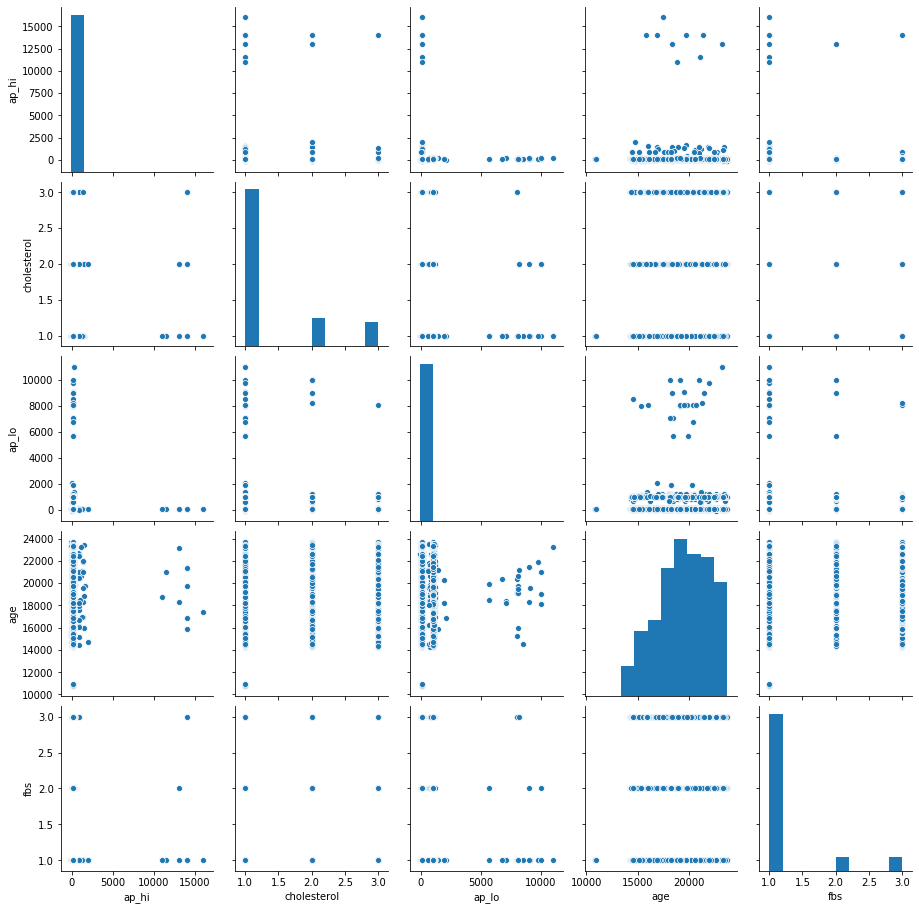

In [30]:
sns.pairplot(heart[numeric_columns])

In [31]:
heart['target']

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: target, Length: 70000, dtype: int64

0    35021
1    34979
Name: target, dtype: int64


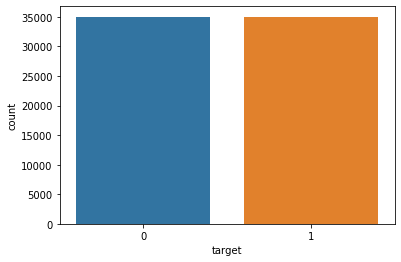

In [32]:
y = heart["target"]

sns.countplot(y)

target_temp = heart.target.value_counts()

print(target_temp)


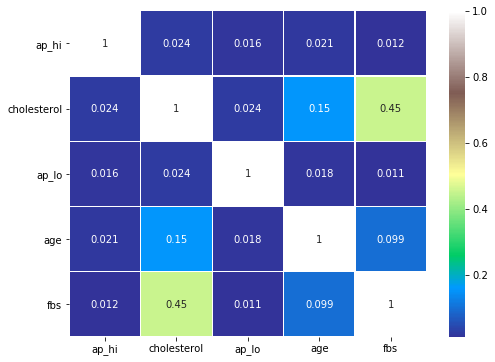

In [33]:
# create a correlation heatmap
sns.heatmap(heart[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

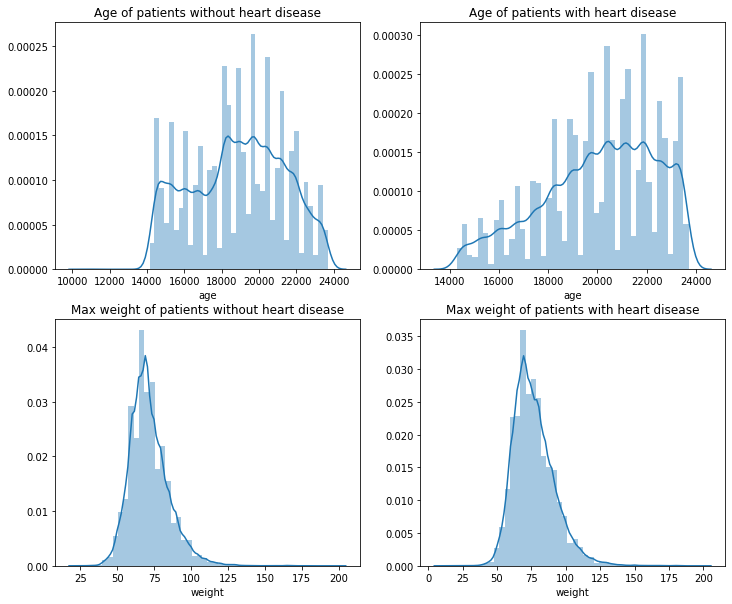

In [34]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(heart[heart['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(heart[heart['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(heart[heart['target']==0].weight )
plt.title('Max weight of patients without heart disease')
plt.subplot(224)
sns.distplot(heart[heart['target']==1].weight )
plt.title('Max weight of patients with heart disease')
plt.show()

In [35]:
# plt.figure(figsize=(13,6))
# plt.subplot(121)
# sns.violinplot(x="target", y="smoke", data=heart, inner=None)
# sns.swarmplot(x="target", y="smoke", data=heart, color='w', alpha=0.5)


# plt.subplot(122)
# sns.swarmplot(x="target", y="smoke", data=heart)
# plt.show()

In [36]:
heart

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,fbs,smoke,alco,active,target
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


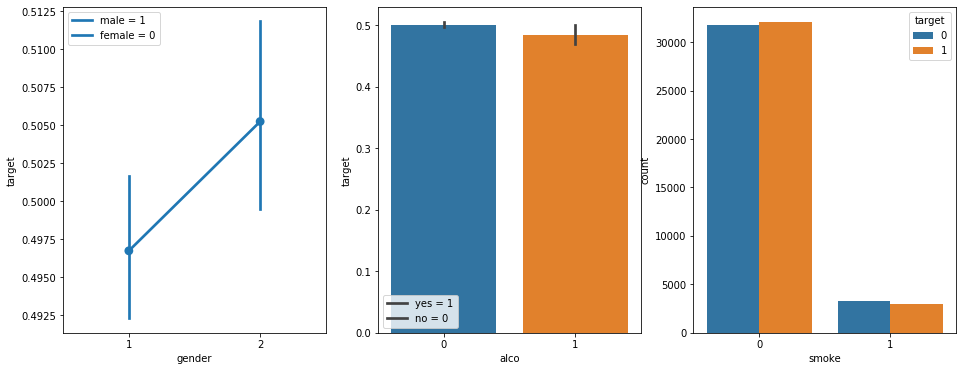

In [37]:
# create pairplot and two barplots
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="gender", y="target", data=heart)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="alco", y="target", data=heart)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="smoke", hue='target', data=heart)
plt.show()

In [38]:
#DATA Preprocessing

In [39]:
########################################################################################

In [40]:
heart['target'].value_counts()

0    35021
1    34979
Name: target, dtype: int64

In [41]:
heart['target'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Name: target, Length: 70000, dtype: bool

In [42]:
heart['target'].sum()

34979

In [43]:
heart['target'].unique()

array([0, 1], dtype=int64)

In [44]:
heart.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
fbs            0
smoke          0
alco           0
active         0
target         0
dtype: int64

In [45]:
#Storing in X and y

In [46]:
X,y=heart,heart.target

In [47]:
X.drop('target',axis=1,inplace=True)

In [48]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: target, Length: 70000, dtype: int64

In [49]:
####Or X, y = heart.iloc[:, :-1], heart.iloc[:, -1]

In [50]:
X.shape

(70000, 11)

In [51]:
y.shape

(70000,)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [53]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [55]:
X_test

array([[-2.01718431,  1.36405487,  0.68705541, ..., -0.31087913,
        -0.23838436, -2.02360695],
       [ 0.70205508, -0.73310834, -0.28735799, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [-1.98800184, -0.73310834, -0.40915967, ..., -0.31087913,
        -0.23838436,  0.49416711],
       ...,
       [ 0.46737933,  1.36405487,  0.07804703, ..., -0.31087913,
         4.19490608,  0.49416711],
       [-1.93976969, -0.73310834, -0.04375464, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [-0.45186869, -0.73310834, -0.89636637, ..., -0.31087913,
         4.19490608,  0.49416711]])

In [56]:
y_test


21955    0
24094    1
47968    0
51361    0
19662    1
        ..
43321    0
44111    1
27754    0
46918    0
58737    1
Name: target, Length: 21000, dtype: int64

In [57]:
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (49000, 11)
train_set_y shape: (49000,)
test_set_x shape: (21000, 11)
test_set_y shape: (21000,)


In [58]:
# Model

In [59]:
# Decision Tree Classifier
scores_dict = {}

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [61]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100

In [62]:
scores_dict['DecisionTreeClassifier'] = accuracy_dt
print(accuracy_dt)

63.48095238095238


In [63]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.635


In [64]:
prediction

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [65]:
#Feature Importance in Decision Trees

In [66]:
print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.31472757 0.02213023 0.15153472 0.15342466 0.23101266 0.04124208
 0.03639518 0.01859322 0.01055419 0.00712892 0.01325656]


C:\Users\Rahbare Azam\anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



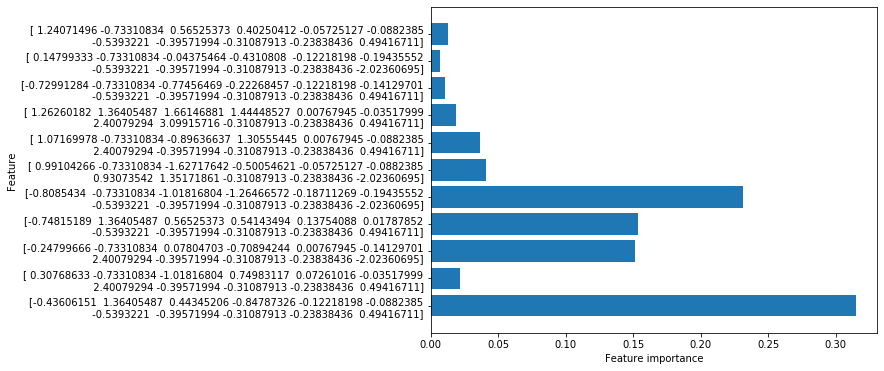

In [67]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = len(heart.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(dt)
plt.savefig('feature_importance')

In [68]:
# KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
k_range=range(1,26)
scores={}
h_score = 0       # to find the best score
best_k=0          # to find the best k
scores_list=[]  

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(y_test,prediction_knn))
print('The best value of k is {} with score : {}'.format(best_k,h_score))

The best value of k is 25 with score : 0.6658095238095239


In [71]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [72]:
prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
print('accuracy_score score     : ',accuracy_score(y_test,prediction_knn)*100,'%')
print('mean_squared_error score : ',mean_squared_error(y_test,prediction_knn)*100,'%')

accuracy_score score     :  66.58095238095238 %
mean_squared_error score :  33.41904761904762 %


In [73]:
scores_dict['KNeighborsClassifier'] = accuracy_knn
accuracy_knn

66.58095238095238

In [74]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.697
Accuracy on test set: 0.666


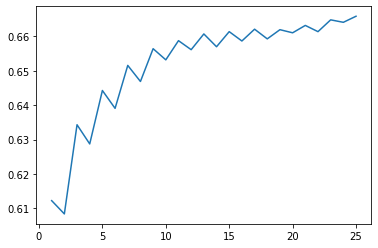

In [75]:
plt.plot(k_range,scores_list)

In [76]:
px.line(x=k_range,y=scores_list)

In [77]:
# LGBMClassifier

In [78]:
from lightgbm import LGBMClassifier

lg=LGBMClassifier(boosting_type='gbdt',n_estimators=5000,learning_rate=0.05,objective='binary',metric='accuracy',is_unbalance=True,
                 colsample_bytree=0.7,reg_lambda=3,reg_alpha=3,random_state=500,n_jobs=-1,num_leaves=35)
lg.fit(X_train,y_train)
ypred = lg.predict(X_test)
print('===============================================')
print('With score : ',accuracy_score(y_test,ypred)*100)
print('===============================================')
scores_dict['LGBMClassifier'] = accuracy_score(y_test,ypred)*100

With score :  72.98571428571428


In [79]:
from sklearn.svm import SVC

model = SVC(C=2.0,kernel='rbf',gamma='auto').fit(X_train,y_train)
Y_predict = model.predict(X_test)
print('Accuracy score : {}%'.format(accuracy_score(y_test,Y_predict)*100))
scores_dict['SVC'] = accuracy_score(y_test,Y_predict)*100

Accuracy score : 72.87142857142858%


In [80]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train,y_train).predict(X_test)
print('Accuracy score : {}%'.format(accuracy_score(y_test,y_pred)*100))
scores_dict['NB'] = accuracy_score(y_test,y_pred)*100

Accuracy score : 58.81428571428572%


In [81]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
y_pred = clf.fit(X_train,y_train).predict(X_test)
print('Accuracy score : {}%'.format(accuracy_score(y_test,y_pred)*100))
scores_dict['LR'] = accuracy_score(y_test,y_pred)*100

Accuracy score : 72.13333333333334%


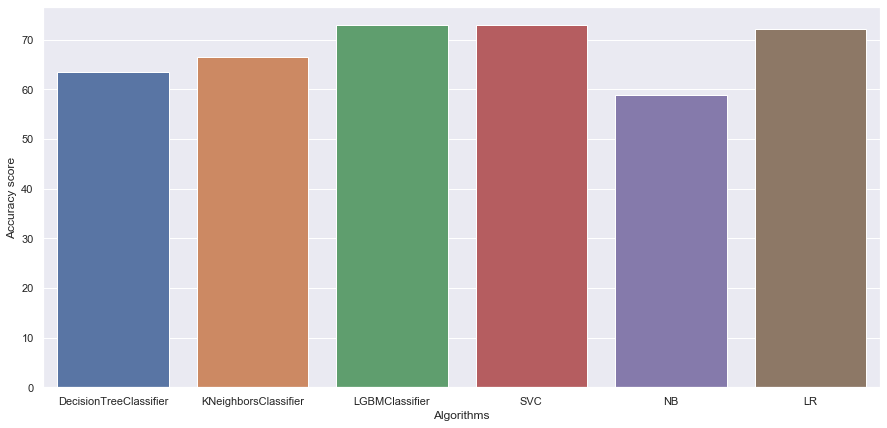

In [82]:
with sns.color_palette('muted'):
  algo_name = list(scores_dict.keys())
  scoress = list(scores_dict.values())

  sns.set(rc={'figure.figsize':(15,7)})
  plt.xlabel("Algorithms")
  plt.ylabel("Accuracy score")

  sns.barplot(algo_name,scoress)

In [83]:
heart

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,fbs,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [92]:
user_input = []
for column in heart.columns:
    if column == 'target':
        continue
    user_input.append(input(f'Value for {column}: '))

Value for age: 1
Value for gender: 1
Value for height: 1
Value for weight: 1
Value for ap_hi: 1
Value for ap_lo: 1
Value for cholesterol: 1
Value for fbs: 1
Value for smoke: 1
Value for alco: 1
Value for active: 1


In [85]:
user_input = np.array(user_input, dtype='float64').reshape(1, -1)
user_input.shape

(1, 11)

In [86]:
clf.predict(user_input)

array([1], dtype=int64)

In [87]:
gnb.predict(user_input)

array([1], dtype=int64)

In [88]:
model.predict(user_input)

array([1], dtype=int64)

In [89]:
lg.predict(user_input)

array([1], dtype=int64)

In [90]:
knn.predict(user_input)

array([1], dtype=int64)

In [91]:
dt.predict(user_input)

array([1], dtype=int64)